## <b> Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV



import graphviz
from sklearn import tree

import imblearn
from imblearn.over_sampling import SMOTE


## <b> Reading & Understanding Data

In [2]:
df =  pd.read_csv('Diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
print("The total of 0 in Pregnancies =", df['Pregnancies'].isin([0]).sum())
print("The total of 0 in Glucose =", df['Glucose'].isin([0]).sum())
print("The total of 0 in BloodPressure =", df['BloodPressure'].isin([0]).sum())
print("The total of 0 in SkinThickness =", df['SkinThickness'].isin([0]).sum())
print("The total of 0 in Insulin =", df['Insulin'].isin([0]).sum())
print("The total of 0 in BMI =", df['BMI'].isin([0]).sum())
print("The total of 0 in Age =", df['Age'].isin([0]).sum())


The total of 0 in Pregnancies = 111
The total of 0 in Glucose = 5
The total of 0 in BloodPressure = 35
The total of 0 in SkinThickness = 227
The total of 0 in Insulin = 374
The total of 0 in BMI = 11
The total of 0 in Age = 0


=======================================================================================================================

As a beginning:

-We have 768 Rows and 9 columns.

-There is no Nan Values

-All the columns in right format

-In describe function, it gave a spolight for some insights but we will be sure of these insights in the analysis process

-There are columns have 0 in its values and this is unlogically. The Columns: Glucose, BloodPressure, SkinThickness, BMI and a very big problem in Insulin column.
#
#

-The last thing, I tried to understand the columns meaning well. Some were easy to understand but other columns, I needed a help of pharmacist to understand the business well.

 1-Pregnancies ---> The number of pregnancies

 2-Glucose ---> is the main sugar found in your blood and measured by getting a spot of blood

 3-BloodPressure ---> Blood pressure is a measure of the force that your heart uses to pump blood around your body.

 4-SkinThickness ---> Triceps skin fold thickness (mm)

 5-Insulin ---> Insulin is a hormone created by your pancreas and measured by blood test.

 6-BMI ---> Body Mass Index

 7-DiabetesPedigreeFunction --->Diabetes pedigree function
 
 8-Age ---> The age of every person.

 9-Outcome ---> The result if he has diabetes or no.

=======================================================================================================================

## <b> Data Cleaning

In [11]:
df2 = df.copy()

In [12]:
df2['Glucose'] = df2['Glucose'].replace(0,df2['Glucose'].mean())
df2['BloodPressure'] = df2['BloodPressure'].replace(0,df2['BloodPressure'].mean())
df2['SkinThickness'] = df2['SkinThickness'].replace(0,df2['SkinThickness'].mean())
df2['BMI'] = df2['BMI'].replace(0,df2['BMI'].mean())

In [13]:
print("The total of 0 in Glucose =", df2['Glucose'].isin([0]).sum())
print("The total of 0 in BloodPressure =", df2['BloodPressure'].isin([0]).sum())
print("The total of 0 in SkinThickness =", df2['SkinThickness'].isin([0]).sum())
print("The total of 0 in BMI =", df2['BMI'].isin([0]).sum())

The total of 0 in Glucose = 0
The total of 0 in BloodPressure = 0
The total of 0 in SkinThickness = 0
The total of 0 in BMI = 0


==========================================================================================================================

## <b> Some Analysis 

#### *I want to know the number of people who have diabetes and who don't have diabetes*

In [14]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

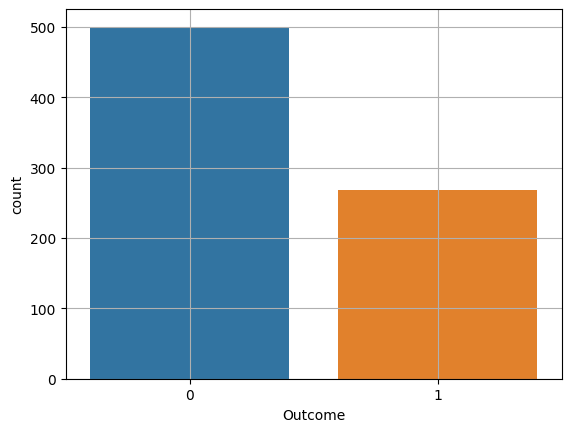

In [15]:
with plt.style.context('default'):
 sns.countplot(x='Outcome',data=df)
 plt.grid()

#####

### *I want to know the most age of people who have diabetes*

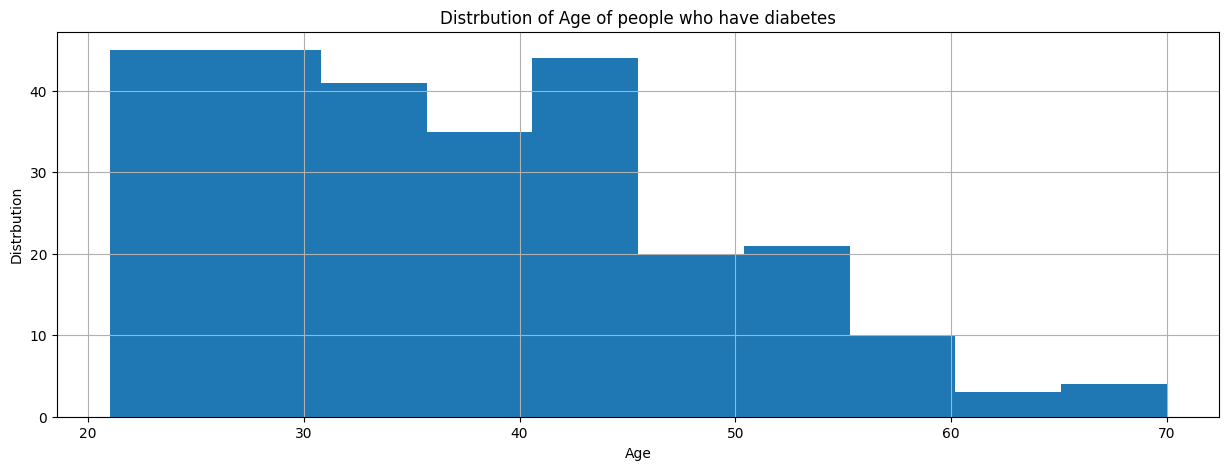

In [16]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Age")
    plt.ylabel("Distrbution")
    plt.title("Distrbution of Age of people who have diabetes")
    plt.hist(df['Age'].where(df['Outcome'] == 1))
    plt.grid()
    plt.show()

### I found that diabetes comes for people of age from (21 --> 31)  and from (40 --> 45) 

#

### *I want to know the blood pressure of people who have diabetes and don't have diabetes*

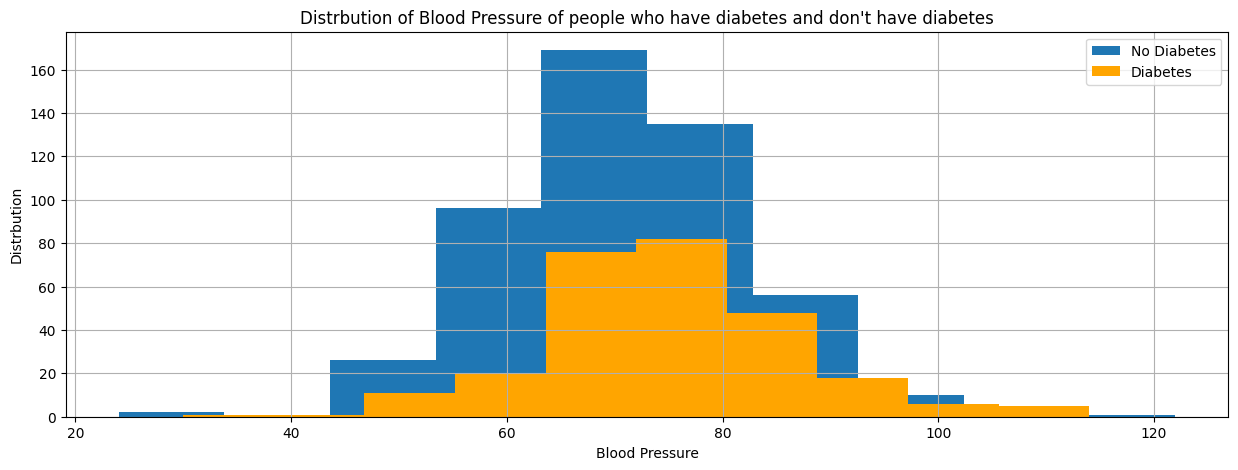

In [ ]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Blood Pressure")
    plt.ylabel("Distrbution")
    plt.title("Distrbution of Blood Pressure of people who have diabetes and don't have diabetes")
    plt.hist(df2['BloodPressure'].where(df2['Outcome'] == 0))
    plt.hist(df2['BloodPressure'].where(df2['Outcome'] == 1) , color="Orange")
    plt.legend(labels = ["No Diabetes" , 'Diabetes'])
    plt.grid()
    plt.show()

### I found that people who have diabetes, have high blood pressure.

####

### *I wanted to know the measure of Glucose of people with diabetes and not with diabetes*

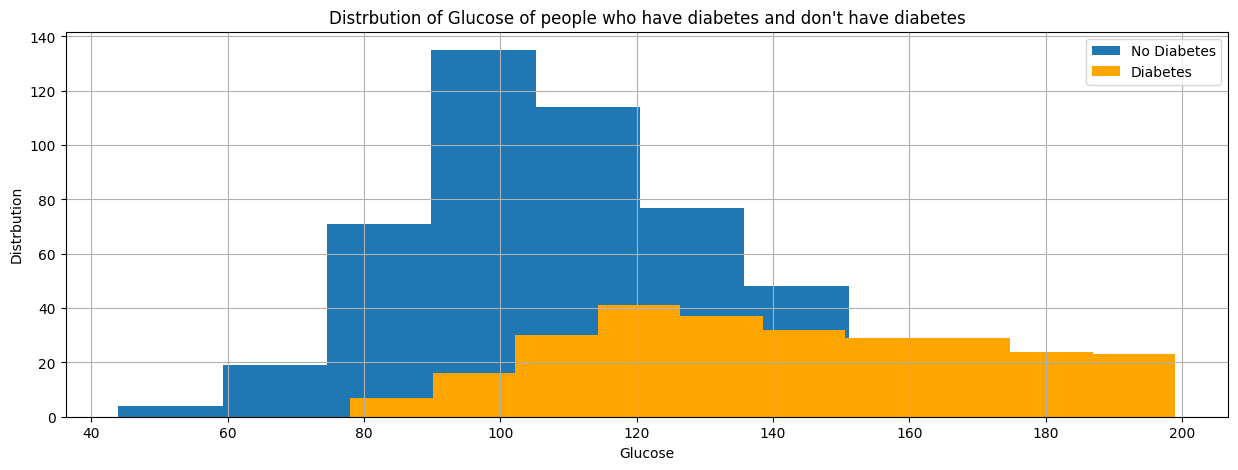

In [ ]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Glucose")
    plt.ylabel("Distrbution")
    plt.title("Distrbution of Glucose of people who have diabetes and don't have diabetes")
    plt.hist(df2['Glucose'].where(df2['Outcome'] == 0))
    plt.hist(df2['Glucose'].where(df2['Outcome'] == 1) , color="Orange")
    plt.legend(labels = ["No Diabetes" , 'Diabetes'])
    plt.grid()
    plt.show()

### When Glucose is more then 120, we should take care. 

###

### *I wanted to know the measure of BMI of people with diabetes and not with diabetes*

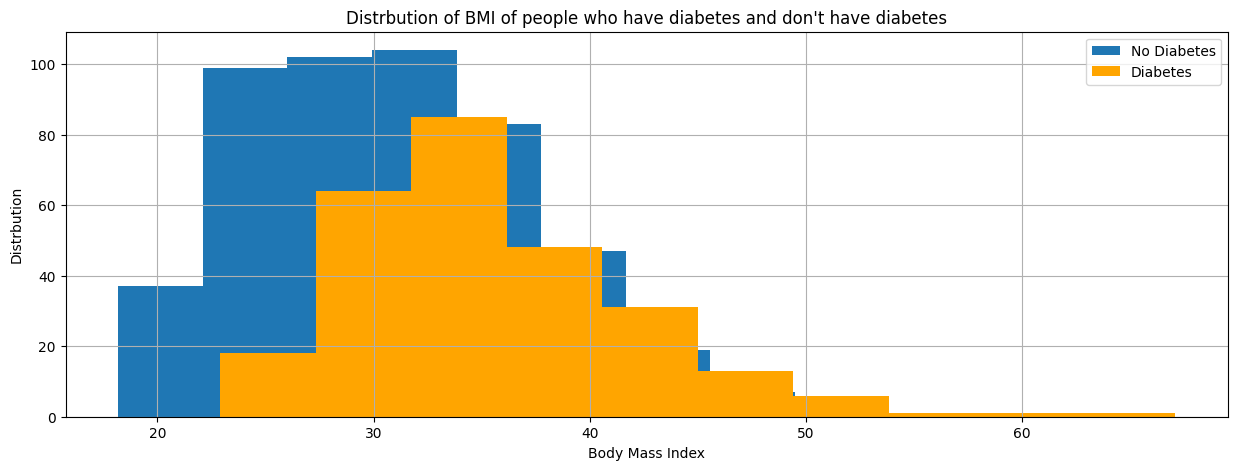

In [ ]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Body Mass Index")
    plt.ylabel("Distrbution")
    plt.title("Distrbution of BMI of people who have diabetes and don't have diabetes")
    plt.hist(df2['BMI'].where(df2['Outcome'] == 0))
    plt.hist(df2['BMI'].where(df2['Outcome'] == 1) , color="Orange")
    plt.legend(labels = ["No Diabetes" , 'Diabetes'])
    plt.grid()
    plt.show()

Below 18.5	Underweight

18.5—24.9	Healthy

25.0—29.9	Overweight

30.0 and Above	Obese

-People with BMI more than or equal 30 have high chance to get diabetes.

###

### *I wanted to know the measure of Skin Thickness of people with diabetes and not with diabetes*

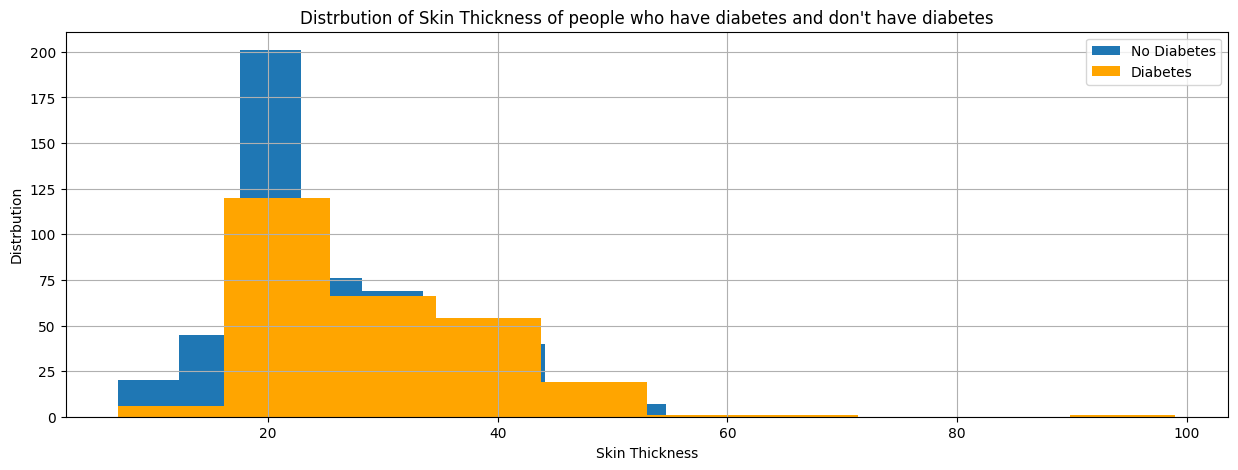

In [ ]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Skin Thickness")
    plt.ylabel("Distrbution")
    plt.title("Distrbution of Skin Thickness of people who have diabetes and don't have diabetes")
    plt.hist(df2['SkinThickness'].where(df2['Outcome'] == 0))
    plt.hist(df2['SkinThickness'].where(df2['Outcome'] == 1) , color="Orange")
    plt.legend(labels = ["No Diabetes" , 'Diabetes'])
    plt.grid()
    plt.show()

### People with diabetes has high skin thickness

###

### *I wanted to know the measure of Insulin of people with diabetes and not with diabetes*

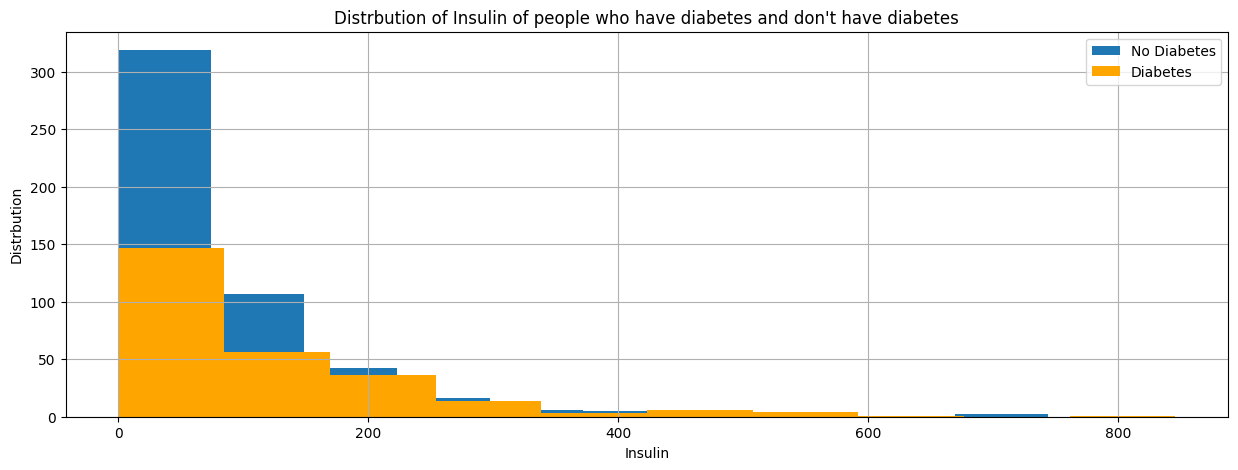

In [ ]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Insulin")
    plt.ylabel("Distrbution")
    plt.title("Distrbution of Insulin of people who have diabetes and don't have diabetes")
    plt.hist(df['Insulin'].where(df['Outcome'] == 0))
    plt.hist(df['Insulin'].where(df['Outcome'] == 1) , color="Orange")
    plt.legend(labels = ["No Diabetes" , 'Diabetes'])
    plt.grid()
    plt.show()

### I found that Insulin is not a perfect feature for taking a decision

###

### *I wanted to know the measure of Pregnancies and DiabetesPedigreeFunction of people with diabetes and not with diabetes*

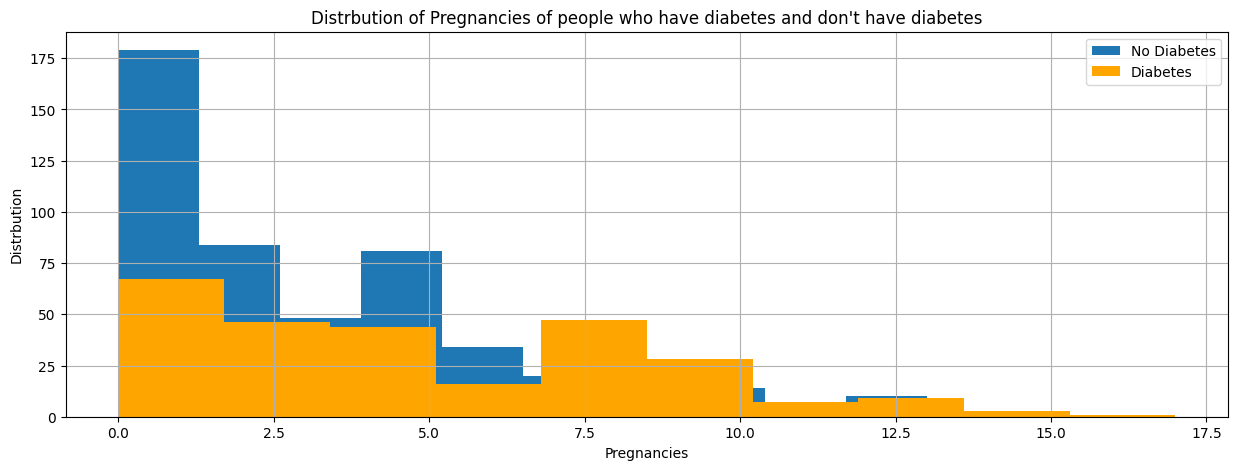

In [ ]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("Pregnancies")
    plt.ylabel("Distrbution")
    plt.title("Distrbution of Pregnancies of people who have diabetes and don't have diabetes")
    plt.hist(df['Pregnancies'].where(df['Outcome'] == 0))
    plt.hist(df['Pregnancies'].where(df['Outcome'] == 1) , color="Orange")
    plt.legend(labels = ["No Diabetes" , 'Diabetes'])
    plt.grid()
    plt.show()

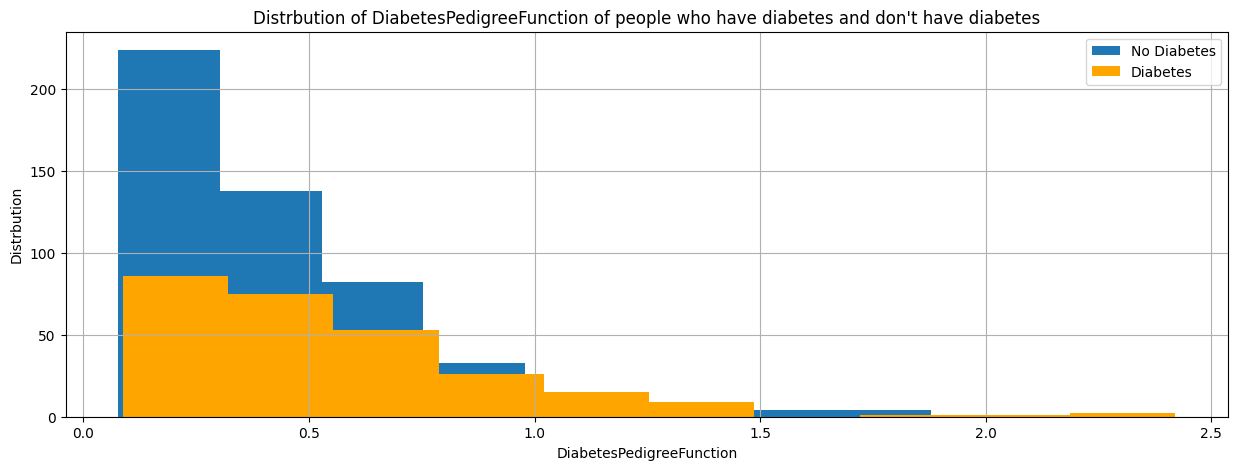

In [ ]:
with plt.style.context('default'):
    fig , ax =  plt.subplots(figsize = (15,5))
    plt.xlabel("DiabetesPedigreeFunction")
    plt.ylabel("Distrbution")
    plt.title("Distrbution of DiabetesPedigreeFunction of people who have diabetes and don't have diabetes")
    plt.hist(df['DiabetesPedigreeFunction'].where(df['Outcome'] == 0))
    plt.hist(df['DiabetesPedigreeFunction'].where(df['Outcome'] == 1) , color="Orange")
    plt.legend(labels = ["No Diabetes" , 'Diabetes'])
    plt.grid()
    plt.show()

### I will not use Pergnancies and DiabetesPedigreeFunction as they are not clear enough to use.

###

### *I wanted to check the outliers of each column.*

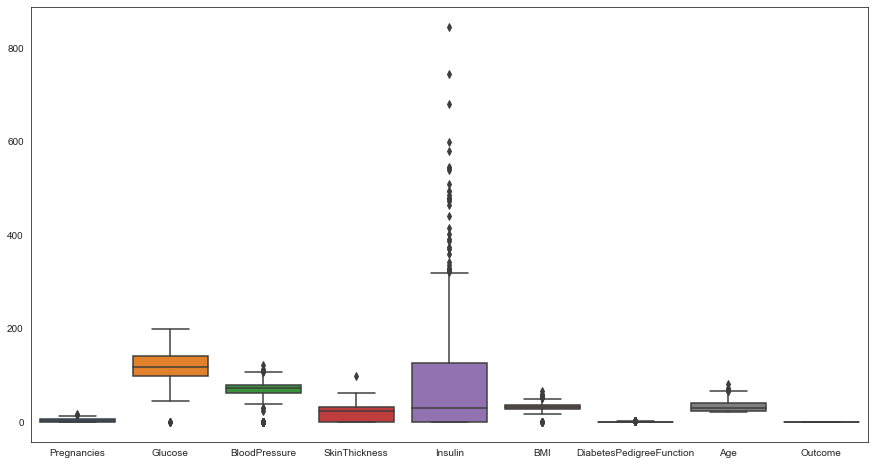

In [ ]:
plt.figure(figsize = (15,8))
x = sns.set_style("white")
x = sns.boxplot(data = df)


### There are many outliers in Insulin column.

###

### *I wanted to see the corrleation between columns*

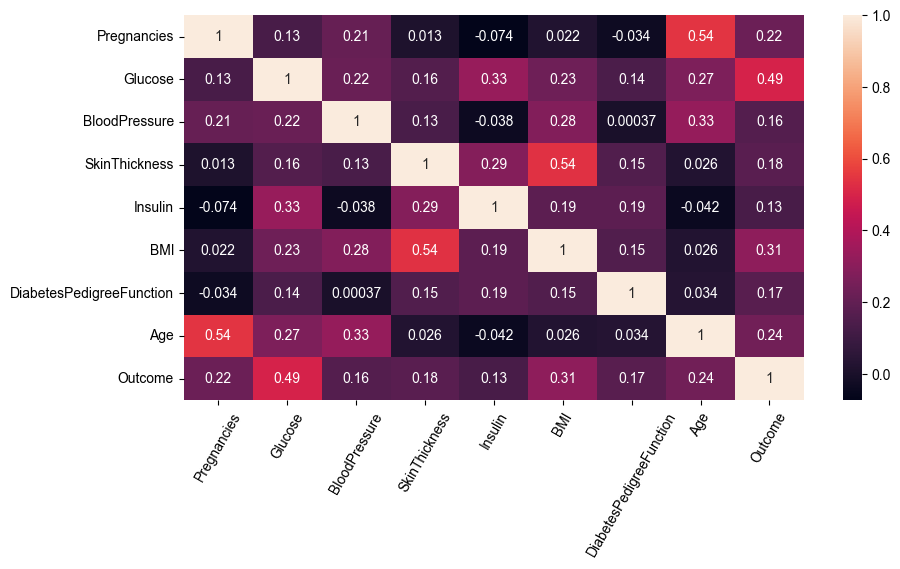

In [ ]:
with plt.style.context('default'):
 fig,ax = plt.subplots(figsize=(10,5))
 sns_plot=sns.heatmap(df2.corr(),annot= True)
 plt.xticks(rotation=60)

 ### I found that the Highest corrleation with the outcome is Glucose.

###

### *I wanted to see the features shape on graphs*

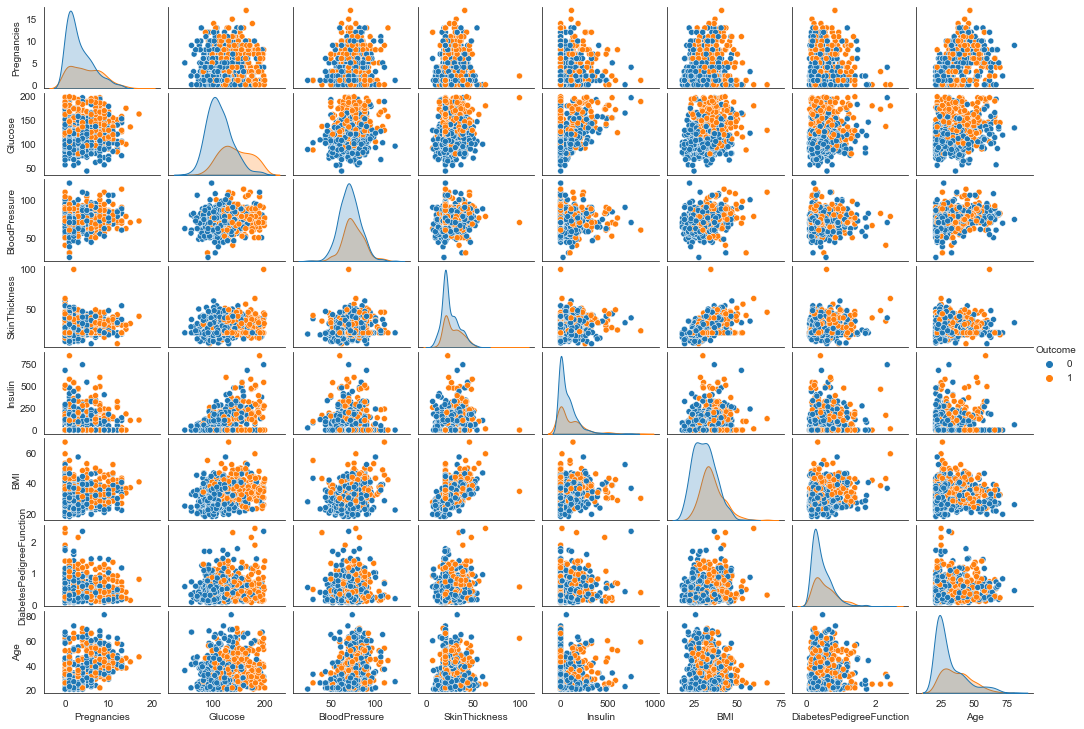

In [ ]:
x = sns.set_style("white")
x = sns.pairplot(df2 , hue = "Outcome")
x.fig.set_size_inches(15,10)

### I may need polynomial features

===========================================================================================================================

## Some insights from the data:

1- Diabetes comes to people of age from (21 --> 31)  and from (40 --> 45).
 
2- People who have diabetes, have high blood pressure.

3- When Glucose reading is more then 120, we should take care.

4- People with BMI more than or equal 30 have high chance to get diabetes.

5- People with diabetes has high skin thickness.
###

## Some insights for Modeling:

1- Insulin reading is not a perfect feature for taking a decision but not bad.

2- Pergnancies and DiabetesPedigreeFunction as they are not clear enough to use.

3- There are many outliers in Insulin column.

4- I may need polynomial features.

5- The Highest corrleation with the outcome is Glucose.

6- Scaling may not be effective.

7- Cleaning zeros made features more clear.

=========================================================================================================================

## <b> Data Pre-Processing

In [ ]:
x = df2.drop(['Outcome', 'Pregnancies','DiabetesPedigreeFunction','Insulin'],axis=1)
y= df2['Outcome']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=44, shuffle= True)

In [ ]:
print("Data before scalling: ")
print(np.max(x_train))
print(np.min(x_train))

Data before scalling: 
Glucose          199.0
BloodPressure    110.0
SkinThickness     99.0
BMI               67.1
Age               81.0
dtype: float64
Glucose          44.0
BloodPressure    24.0
SkinThickness     7.0
BMI              18.2
Age              21.0
dtype: float64


In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Data after scalling: ")
print(np.max(x_train))
print(np.min(x_train))

Data after scalling: 
7.33574326151954
-3.9184096356064484


Scalling didn't make effect.

====================================================================================================================

## <b> Logistic Regression Model

In [ ]:
clf = LogisticRegression(random_state=0)
clf.fit(x_train,y_train)
predictionsOfLogisticRegression = clf.predict(x_test)

================================================================================================================

## <b>Evaluation for Logistic Regression Model

In [ ]:
train_predict_logistic = clf.predict(x_train)
accOfLogisticTraining = accuracy_score(y_train,train_predict_logistic) * 100
print("Training Accuracy:" , accOfLogisticTraining , "%")

Training Accuracy: 75.86805555555556 %


In [ ]:
accOfLogisticTest = accuracy_score(y_test,predictionsOfLogisticRegression) * 100
print("Test Accuracy:" , accOfLogisticTest , "%")

Test Accuracy: 81.25 %


c:\Users\omara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


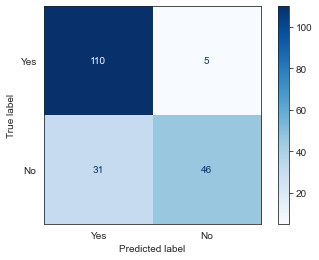

In [ ]:
disp = plot_confusion_matrix(clf, x_test, y_test,display_labels=['Yes','No'],cmap=plt.cm.Blues)

In [ ]:
print(metrics.classification_report(y_test, predictionsOfLogisticRegression))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       115
           1       0.90      0.60      0.72        77

    accuracy                           0.81       192
   macro avg       0.84      0.78      0.79       192
weighted avg       0.83      0.81      0.80       192



In [ ]:
conf = confusion_matrix(y_test, predictionsOfLogisticRegression)
conf

array([[110,   5],
       [ 31,  46]], dtype=int64)

=================================================================================================================

## <b> Optimization & Cross Validation for Logistic Regression Model

In [ ]:
parameters = {
    'penalty': ['l1','l2'],
    'random_state': list(range(0,45))
}

In [ ]:
gs_Logistic = GridSearchCV(clf,param_grid=parameters,verbose=5)

In [ ]:
gs_Logistic.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ..........penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 2/5] END ..........penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 3/5] END ..........penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 4/5] END ..........penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 5/5] END ..........penalty=l1, random_state=0;, score=nan total time=   0.0s
[CV 1/5] END ..........penalty=l1, random_state=1;, score=nan total time=   0.0s
[CV 2/5] END ..........penalty=l1, random_state=1;, score=nan total time=   0.0s
[CV 3/5] END ..........penalty=l1, random_state=1;, score=nan total time=   0.0s
[CV 4/5] END ..........penalty=l1, random_state=1;, score=nan total time=   0.0s
[CV 5/5] END ..........penalty=l1, random_state=1;, score=nan total time=   0.0s
[CV 1/5] END ..........penalty=l1, random_state=2;, score=nan total time=   0.0s
[CV 2/5] END ..........penalty=l1, random_state

c:\Users\omara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
225 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\omara\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\omara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\omara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Va

GridSearchCV(estimator=LogisticRegression(random_state=0),
             param_grid={'penalty': ['l1', 'l2'],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             verbose=5)

In [ ]:
pd.DataFrame(gs_Logistic.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001019,0.000363,0.000000,0.000000,l1,0,"{'penalty': 'l1', 'random_state': 0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,46
1,0.000783,0.000540,0.000000,0.000000,l1,1,"{'penalty': 'l1', 'random_state': 1}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,65
2,0.000957,0.000247,0.000000,0.000000,l1,2,"{'penalty': 'l1', 'random_state': 2}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
3,0.000673,0.000503,0.000000,0.000000,l1,3,"{'penalty': 'l1', 'random_state': 3}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
4,0.001039,0.000063,0.000000,0.000000,l1,4,"{'penalty': 'l1', 'random_state': 4}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.003545,0.001798,0.000887,0.001019,l2,40,"{'penalty': 'l2', 'random_state': 40}",0.784483,0.73913,0.730435,0.686957,0.817391,0.751679,0.045149,1
86,0.003839,0.001154,0.000289,0.000394,l2,41,"{'penalty': 'l2', 'random_state': 41}",0.784483,0.73913,0.730435,0.686957,0.817391,0.751679,0.045149,1
87,0.003233,0.001265,0.000230,0.000459,l2,42,"{'penalty': 'l2', 'random_state': 42}",0.784483,0.73913,0.730435,0.686957,0.817391,0.751679,0.045149,1
88,0.004409,0.001103,0.000167,0.000333,l2,43,"{'penalty': 'l2', 'random_state': 43}",0.784483,0.73913,0.730435,0.686957,0.817391,0.751679,0.045149,1


In [ ]:
best_clf_Logistic = gs_Logistic.best_estimator_

In [ ]:
best_clf_Logistic

LogisticRegression(random_state=0)

=========================================================================================================================

## <b>The best Logistic Regression Model after Optimization

Remains Same

=========================================================================================================================

## <b> K Neighbors Classifier Model

In [ ]:
clf2 = KNeighborsClassifier()
clf2.fit(x_train,y_train)
predictionsOfKNN = clf2.predict(x_test)

===========================================================================================================================

 ## <b>Evaluation for K Neighbors Classifier Model

In [ ]:
train_predict_KNN = clf2.predict(x_train)
accOfKnnTraining = accuracy_score(y_train,train_predict_KNN) * 100
print("Training Accuracy:" , accOfKnnTraining , "%")

Training Accuracy: 81.25 %


In [ ]:
accOfKnnTest = accuracy_score(y_test,predictionsOfKNN) * 100
print("Test Accuracy:" , accOfKnnTest, "%")

Test Accuracy: 75.52083333333334 %


c:\Users\omara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


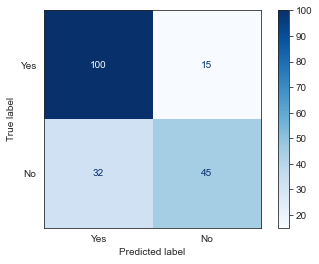

In [ ]:
disp = plot_confusion_matrix(clf2, x_test, y_test,display_labels=['Yes','No'],cmap=plt.cm.Blues)

In [ ]:
print(metrics.classification_report(y_test, predictionsOfKNN))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       115
           1       0.75      0.58      0.66        77

    accuracy                           0.76       192
   macro avg       0.75      0.73      0.73       192
weighted avg       0.75      0.76      0.75       192



=======================================================================================================================

## <b> Optimization & Cross Validation for K Neighbors Classifier Model

In [ ]:
parameters = {
    'n_neighbors': list(range(2,10)),
    'weights': ['uniform','distance']
}

In [ ]:
gs_KNN = GridSearchCV(clf2,param_grid=parameters,verbose=5)

In [ ]:
gs_KNN.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....n_neighbors=2, weights=uniform;, score=0.750 total time=   0.0s
[CV 2/5] END ....n_neighbors=2, weights=uniform;, score=0.687 total time=   0.0s
[CV 3/5] END ....n_neighbors=2, weights=uniform;, score=0.739 total time=   0.0s
[CV 4/5] END ....n_neighbors=2, weights=uniform;, score=0.635 total time=   0.0s
[CV 5/5] END ....n_neighbors=2, weights=uniform;, score=0.661 total time=   0.0s
[CV 1/5] END ...n_neighbors=2, weights=distance;, score=0.698 total time=   0.0s
[CV 2/5] END ...n_neighbors=2, weights=distance;, score=0.635 total time=   0.0s
[CV 3/5] END ...n_neighbors=2, weights=distance;, score=0.678 total time=   0.0s
[CV 4/5] END ...n_neighbors=2, weights=distance;, score=0.617 total time=   0.0s
[CV 5/5] END ...n_neighbors=2, weights=distance;, score=0.600 total time=   0.0s
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.741 total time=   0.0s
[CV 2/5] END ....n_neighbors=3, weights=uniform;

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             verbose=5)

In [ ]:
pd.DataFrame(gs_KNN.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001858,0.001008,0.005789,0.000698,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.750000,0.686957,0.739130,0.634783,0.660870,0.694348,0.044331,15
1,0.001432,0.000659,0.001952,0.000268,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.698276,0.634783,0.678261,0.617391,0.600000,0.645742,0.036969,16
2,0.002213,0.000675,0.005023,0.001003,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.741379,0.678261,0.756522,0.669565,0.686957,0.706537,0.035390,9
3,0.002508,0.001184,0.001449,0.000840,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.741379,0.678261,0.747826,0.669565,0.686957,0.704798,0.033026,11
4,0.001498,0.000619,0.005000,0.001496,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.775862,0.695652,0.782609,0.695652,0.730435,0.736042,0.037545,1
5,0.003209,0.001786,0.001022,0.000920,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.724138,0.686957,0.739130,0.704348,0.686957,0.708306,0.020630,8
6,0.004059,0.001770,0.005742,0.003187,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.741379,0.660870,0.765217,0.695652,0.721739,0.716972,0.036189,6
7,0.003715,0.001666,0.002111,0.001843,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.741379,0.669565,0.782609,0.695652,0.730435,0.723928,0.038846,4
8,0.004938,0.002118,0.007342,0.001622,6,uniform,"{'n_neighbors': 6, 'weights': 'uniform'}",0.732759,0.660870,0.756522,0.686957,0.721739,0.711769,0.033909,7
9,0.002731,0.001109,0.002104,0.001482,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",0.724138,0.652174,0.756522,0.686957,0.669565,0.697871,0.037785,14


In [ ]:
best_clf_KNN = gs_KNN.best_estimator_

In [ ]:
best_clf_KNN

KNeighborsClassifier(n_neighbors=4)

========================================================================================================================

## <b>The best KNN Model after Optimization

In [ ]:
clf22 = KNeighborsClassifier(n_neighbors=4)
clf22.fit(x_train,y_train)
predictionsOfKNN2 = clf22.predict(x_test)

In [ ]:
train_predict_KNN2 = clf2.predict(x_train)
accOfKnnTraining2 = accuracy_score(y_train,train_predict_KNN) * 100
print("Training Accuracy:" , accOfKnnTraining2 , "%")

Training Accuracy: 81.25 %


In [ ]:
accOfKnnTest2 = accuracy_score(y_test,predictionsOfKNN2) * 100
print("Test Accuracy:" , accOfKnnTest2, "%")

Test Accuracy: 73.95833333333334 %


c:\Users\omara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


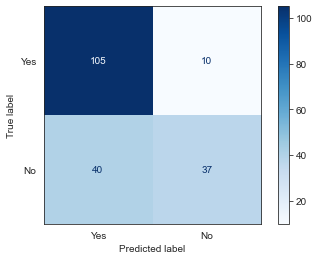

In [ ]:
disp = plot_confusion_matrix(clf22, x_test, y_test,display_labels=['Yes','No'],cmap=plt.cm.Blues)

In [ ]:
conf2 = confusion_matrix(y_test, predictionsOfKNN2)
conf2

array([[105,  10],
       [ 40,  37]], dtype=int64)

======================================================================================================================

======================================================================================================================

## <b> Decision Tree Classifier Model

In [ ]:
clf3 = DecisionTreeClassifier()
clf3.fit(x_train,y_train)
predictionsOfDecisionTree = clf3.predict(x_test)

==================================================================================================================================

 ## <b>Evaluation for Decision Tree Classifier Model

In [ ]:
train_predict_DecisionTree = clf3.predict(x_train)
accOfDecisionTreeTraining = accuracy_score(y_train,train_predict_DecisionTree) * 100
print("Training Accuracy:" , accOfDecisionTreeTraining , "%")

Training Accuracy: 100.0 %


In [ ]:
accOfDecisionTreeTest = accuracy_score(y_test,predictionsOfDecisionTree) * 100
print("Test Accuracy:" , accOfDecisionTreeTest, "%")

Test Accuracy: 73.95833333333334 %


c:\Users\omara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


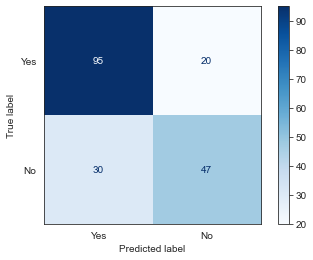

In [ ]:
disp = plot_confusion_matrix(clf3, x_test, y_test,display_labels=['Yes','No'],cmap=plt.cm.Blues)

In [ ]:
print(metrics.classification_report(y_test, predictionsOfDecisionTree))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       115
           1       0.70      0.61      0.65        77

    accuracy                           0.74       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.74      0.74      0.74       192



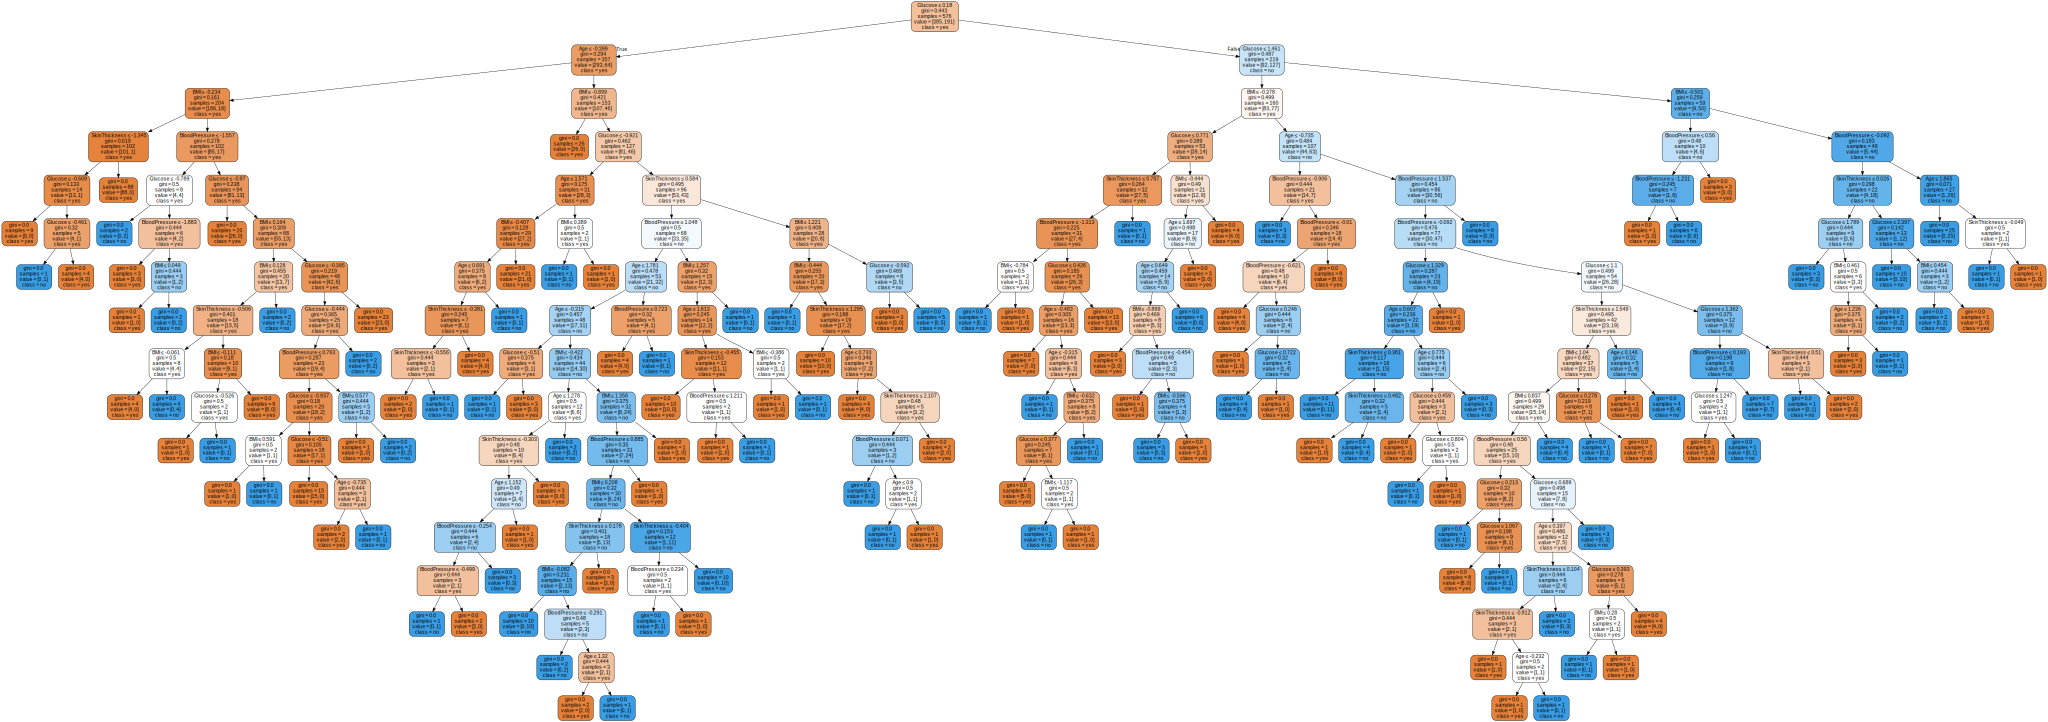

In [ ]:
dot_data = tree.export_graphviz(clf3, out_file=None, 
                         feature_names = df2.columns.drop(['Outcome', 'Pregnancies', 'Insulin' ,'DiabetesPedigreeFunction' ]),  
                         class_names = ["yes","no"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

=====================================================================================================================

## <b> Optimization & Cross Validation for Decision Tree Classifier Model

In [ ]:
parameters = {
    'max_depth': list(range(3,10)),
    'criterion': ['gini','entropy'],
    'random_state': list(range(0,45)),
}

In [ ]:
gs = GridSearchCV(clf3,param_grid=parameters,verbose=5)

In [ ]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 630 candidates, totalling 3150 fits
[CV 1/5] END criterion=gini, max_depth=3, random_state=0;, score=0.681 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, random_state=0;, score=0.696 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, random_state=0;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, random_state=0;, score=0.678 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, random_state=0;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, random_state=1;, score=0.681 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, random_state=1;, score=0.696 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, random_state=1;, score=0.722 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, random_state=1;, score=0.678 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, random_state=1;, score=0.817 total time=   0.0s
[CV 1/5] END criterion=gini, max_dep

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]},
             verbose=5)

In [ ]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002646,0.000710,0.001085,0.000992,gini,3,0,"{'criterion': 'gini', 'max_depth': 3, 'random_...",0.681034,0.695652,0.721739,0.678261,0.817391,0.718816,0.051642,46
1,0.002561,0.000570,0.000542,0.000453,gini,3,1,"{'criterion': 'gini', 'max_depth': 3, 'random_...",0.681034,0.695652,0.721739,0.678261,0.817391,0.718816,0.051642,46
2,0.002517,0.000495,0.000444,0.000549,gini,3,2,"{'criterion': 'gini', 'max_depth': 3, 'random_...",0.681034,0.695652,0.721739,0.678261,0.817391,0.718816,0.051642,46
3,0.002067,0.000251,0.000392,0.000481,gini,3,3,"{'criterion': 'gini', 'max_depth': 3, 'random_...",0.681034,0.695652,0.721739,0.678261,0.817391,0.718816,0.051642,46
4,0.002318,0.000398,0.000499,0.000446,gini,3,4,"{'criterion': 'gini', 'max_depth': 3, 'random_...",0.681034,0.695652,0.721739,0.678261,0.817391,0.718816,0.051642,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,0.010432,0.000540,0.002792,0.000763,entropy,9,40,"{'criterion': 'entropy', 'max_depth': 9, 'rand...",0.629310,0.678261,0.686957,0.643478,0.739130,0.675427,0.038332,602
626,0.004989,0.002466,0.000262,0.000388,entropy,9,41,"{'criterion': 'entropy', 'max_depth': 9, 'rand...",0.620690,0.704348,0.695652,0.634783,0.721739,0.675442,0.040096,600
627,0.006425,0.002106,0.000200,0.000399,entropy,9,42,"{'criterion': 'entropy', 'max_depth': 9, 'rand...",0.655172,0.643478,0.695652,0.626087,0.713043,0.666687,0.032581,626
628,0.006703,0.001471,0.000204,0.000409,entropy,9,43,"{'criterion': 'entropy', 'max_depth': 9, 'rand...",0.646552,0.704348,0.695652,0.686957,0.713043,0.689310,0.023080,540


In [ ]:
best_clf = gs.best_estimator_

In [ ]:
best_clf

DecisionTreeClassifier(max_depth=4, random_state=7)

==================================================================================================================

## <b>The best Decision Tree Model after Optimization

In [ ]:
clf32 = DecisionTreeClassifier(max_depth=4 , random_state=7)
clf32.fit(x_train,y_train)
predictionsOfDecisionTree2 = clf32.predict(x_test)

In [ ]:
train_predict_DecisionTree2 = clf32.predict(x_train)
accOfDecisionTreeTraining2 = accuracy_score(y_train,train_predict_DecisionTree2) * 100
print("Training Accuracy:" , accOfDecisionTreeTraining2 , "%")

Training Accuracy: 78.99305555555556 %


In [ ]:
accOfDecisionTreeTest2 = accuracy_score(y_test,predictionsOfDecisionTree2) * 100
print("Test Accuracy:" , accOfDecisionTreeTest2, "%")

Test Accuracy: 78.125 %


c:\Users\omara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


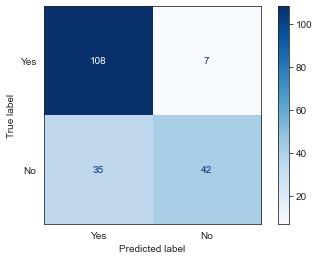

In [ ]:
disp = plot_confusion_matrix(clf32, x_test, y_test,display_labels=['Yes','No'],cmap=plt.cm.Blues)

In [ ]:
conf3 = confusion_matrix(y_test, predictionsOfDecisionTree2)
conf3

array([[108,   7],
       [ 35,  42]], dtype=int64)

In [ ]:
print(metrics.classification_report(y_test, predictionsOfDecisionTree2))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       115
           1       0.86      0.55      0.67        77

    accuracy                           0.78       192
   macro avg       0.81      0.74      0.75       192
weighted avg       0.80      0.78      0.77       192



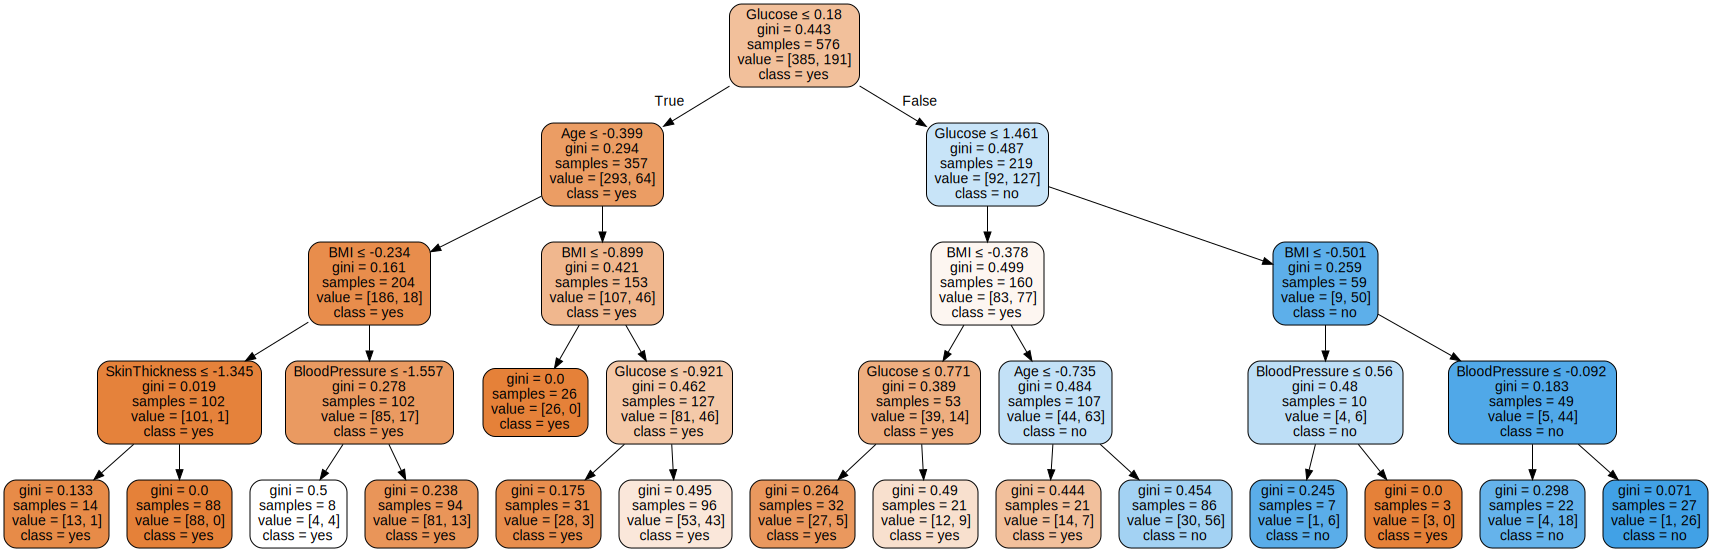

In [ ]:
dot_data2 = tree.export_graphviz(clf32, out_file=None, 
                         feature_names = df2.columns.drop(['Outcome', 'Pregnancies', 'Insulin' ,'DiabetesPedigreeFunction' ]),  
                         class_names = ["yes","no"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data2)  
graph

==================================================================================================================

## <b>The Best Model

In [ ]:
poly = PolynomialFeatures(degree=8)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [ ]:
clf_best = LogisticRegression(random_state=0)
clf_best.fit(x_train_poly,y_train)
predictionsOfLogisticRegression2 = clf_best.predict(x_test_poly)

c:\Users\omara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
train_predict_logistic2 = clf_best.predict(x_train_poly)
accOfLogisticTraining2 = accuracy_score(y_train,train_predict_logistic2) * 100
print("Training Accuracy:" , accOfLogisticTraining2 , "%")

Training Accuracy: 81.59722222222221 %


In [ ]:
accOfLogisticTest2 = accuracy_score(y_test,predictionsOfLogisticRegression2) * 100
print("Test Accuracy:" , accOfLogisticTest2 , "%")

Test Accuracy: 78.125 %


c:\Users\omara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


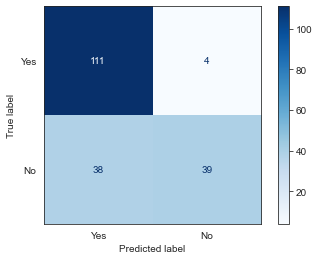

In [ ]:
disp = plot_confusion_matrix(clf_best, x_test_poly, y_test,display_labels=['Yes','No'],cmap=plt.cm.Blues)

In [ ]:
conf_best = confusion_matrix(y_test, predictionsOfLogisticRegression2)
conf_best

array([[111,   4],
       [ 38,  39]], dtype=int64)

=====================================================================================================================

=======================================================================================================================

=============================================================================

# OUT OF THE BOX

## Trying to use SMOTE to balance data

In [ ]:
sm = SMOTE(sampling_strategy='minority' ,random_state=44)
X_resampled, y_resampled = sm.fit_resample(x_train, y_train)

c:\Users\omara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


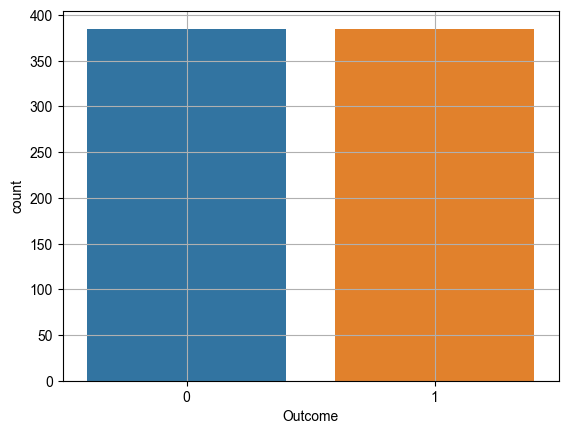

In [ ]:
with plt.style.context('default'):
 sns.countplot(y_resampled,data=df2)
 plt.grid()

In [ ]:
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
x_test = scaler.transform(x_test)

In [ ]:
poly = PolynomialFeatures(degree=8)
x_train_poly2 = poly.fit_transform(X_resampled)
x_test_poly2 = poly.transform(x_test)

In [ ]:
clf4 = LogisticRegression(random_state=0)
clf4.fit(x_train_poly2,y_resampled)
predictionsOfLogisticRegression2 = clf4.predict(x_test_poly2)

c:\Users\omara\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
train_predict_logistic2 = clf4.predict(x_train_poly2)
accOfLogisticTraining2= accuracy_score(y_resampled,train_predict_logistic2) * 100
print("Training Accuracy:" , accOfLogisticTraining2 , "%")

Training Accuracy: 77.92207792207793 %


In [ ]:
accOfLogisticTest2 = accuracy_score(y_test,predictionsOfLogisticRegression2) * 100
print("Test Accuracy:" , accOfLogisticTest2 , "%")

Test Accuracy: 82.29166666666666 %


c:\Users\omara\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


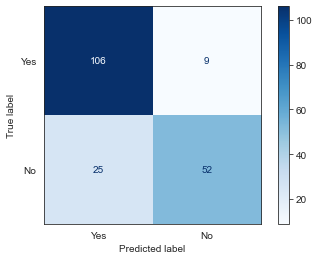

In [ ]:
disp2 = plot_confusion_matrix(clf4, x_test_poly2, y_test,display_labels=['Yes','No'],cmap=plt.cm.Blues)

In [ ]:
conf = confusion_matrix(y_test, predictionsOfLogisticRegression2)

In [ ]:
print ("Confusion Matrix : \n", conf)

Confusion Matrix : 
 [[106   9]
 [ 25  52]]
